In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as st


## Import and view data

In [2]:
# Read in as pandas dataframe

df = pd.read_csv('reddit_exercise_data.csv')

df.head()

,title,review,product_name,iso,score,date,app_bought,money_spent
0,Love it!,I use this app to read r/nosleep stories befor...,Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,47,140
1,•••,Dank memes,Reddit Official App: Trending News and Hot Topics,MY,5,17-7-10 0:0:0,3,10
2,Very good app,"Love the app, makes using Reddit very convenient",Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,61,182
3,CNN here,As the CEO of CNN I find this app repulsive. A...,Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,3,6
4,Easy peasy!,"I was infrequent in my visits, mainly mobile w...",Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,59,178


In [3]:
# Check data types and for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
title           5000 non-null object
review          5000 non-null object
product_name    5000 non-null object
iso             5000 non-null object
score           5000 non-null int64
date            5000 non-null object
app_bought      5000 non-null int64
money_spent     5000 non-null int64
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


In [4]:
df.product_name.unique() # Can drop this as only looking at the reddit app
df = df.drop(columns='product_name')

## Check the statistics 
* Are there any unusual figures/outliers? 
* Range of values?
* What are the distributions like?

Let's look at a quick description of the data and the distributions for the columns to be binned.


In [5]:
# Can see ranges and mean values
df.describe()

,score,app_bought,money_spent
count,5000.00000,5000.000000,5000.000000
mean,4.55200,48.721200,143.461600
std,1.01799,28.575178,115.866138
min,1.00000,0.000000,0.000000
25%,5.00000,24.000000,53.000000
50%,5.00000,48.000000,108.000000
75%,5.00000,72.000000,210.000000
max,5.00000,100.000000,500.000000


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


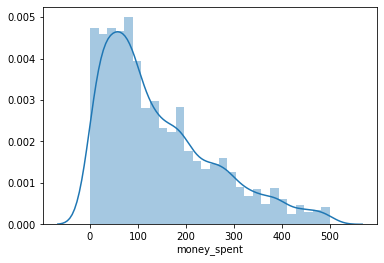

In [6]:
sns.distplot(df['money_spent']);

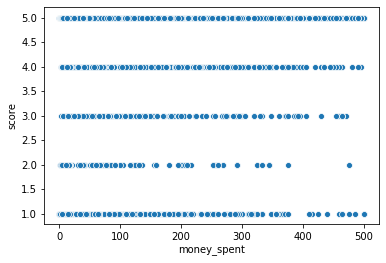

In [7]:
sns.scatterplot(x=df['money_spent'],y=df['score']);

In [8]:
df['money_spent_binned'] = pd.qcut(df['money_spent'], q=4)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


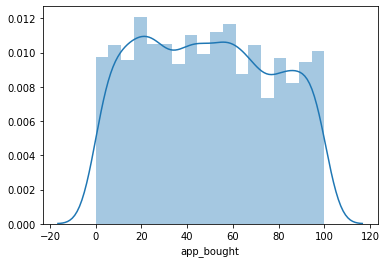

In [9]:
sns.distplot(df['app_bought']);

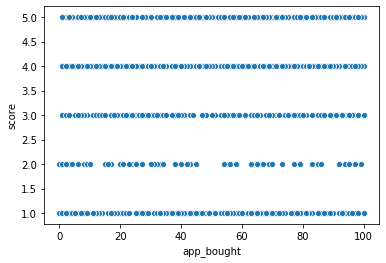

In [10]:
sns.scatterplot(x=df['app_bought'],y=df['score']);

In [11]:
df['apps_bought_binned'] = pd.cut(df['app_bought'], bins=10) # Uniform distribution so can split into bins of equal size


## Cleaning date column

Is the format for the date column standardised?
<br>I will assume the data is all for the year 2017


In [12]:
df.date.value_counts() # No, let's convert, as all times are 0 we will neglect them


17-6-28 0:0:0          403
2017-06-01 00:00:00    391
17-6-27 0:0:0          318
2017-05-31 00:00:00    296
17-6-29 0:0:0          253
2017-06-02 00:00:00    233
17-6-30 0:0:0          217
2017-06-03 00:00:00    135
17-7-1 0:0:0           128
2017-06-05 00:00:00    125
2017-05-24 00:00:00    122
17-7-2 0:0:0           116
2017-06-06 00:00:00    115
17-7-3 0:0:0           113
17-7-4 0:0:0           107
17-7-9 0:0:0           105
17-6-4 0:0:0           100
17-7-7 0:0:0            97
2017-06-07 00:00:00     97
17-7-8 0:0:0            96
2017-05-25 00:00:00     93
17-7-6 0:0:0            93
2017-05-29 00:00:00     91
17-7-5 0:0:0            86
2017-05-26 00:00:00     84
17-6-13 0:0:0           82
2017-06-08 00:00:00     78
17-6-11 0:0:0           72
17-6-14 0:0:0           72
2017-05-30 00:00:00     68
2017-05-28 00:00:00     66
2017-05-27 00:00:00     60
2017-06-09 00:00:00     57
17-6-12 0:0:0           56
17-6-10 0:0:0           53
2017-06-04 00:00:00     41
17-6-15 0:0:0           32
1

In [13]:
# Convert to datetime objects
df['date'] = pd.to_datetime(df['date'],yearfirst=True)


In [14]:
def reassign_dates(dataframe, column_name, original_value, new_value, yearfirst):
    """ Used to locate and re-assign specific row values for datetime objects.
    Yearfirst should be a 0 (no) or 1 (yes) integer value"""
        
    df=dataframe    
    
    # Convert to string 
    df[column_name] = df[column_name].astype('str')

    # Re-assign date
    df.loc[df[column_name]==original_value, column_name] = new_value

    # Convert back to datetime object and check value_counts
    if yearfirst==0:
        df[column_name] = pd.to_datetime(df[column_name],yearfirst=False)
        return df
        
    elif yearfirst==1:
        df[column_name] = pd.to_datetime(df[column_name],yearfirst=True)
        return df
    
    else:
        return("yearfirst must be 0 or 1 integer value.")    
    
df = reassign_dates(df, 'date', '2006-09-17', '2017-09-06',yearfirst=1)
df.ead()

AttributeError: 'DataFrame' object has no attribute 'ead'

In [ ]:
df['full_review'] = df['title'] + df['review']


### Add 'full_review' column
This combinesthe title and review and adds it as a new column. I have done this as I have noticed some reviews lead from the title, especially where the title holds the main information - such as "No Landscape Mode".

In [ ]:
import re  # RegularExpressions

# The regex code for the symbols and punctuation to be removed. We will simply remove the punctuation but
# will replace the set of symbols with a space so we don't join two separate words together!
# Also will make all words lowercase.

replace_with_space = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)|(\n*\n)|(\r*\n)|(#&)")
remove = re.compile("[.;:!\'?,\"()\[\]]")

def remove_symbols(reviews):
    reviews = [replace_with_space.sub(" ", i.lower()) for i in reviews]
    
    return reviews

def remove_punctuation(reviews):
    reviews = [remove.sub("", i.lower() ) for i in reviews]
    
    return reviews

def clean_text(df, text_columns):
    for text_column in text_columns:
        df[text_column] = remove_symbols(df[text_column])
        df[text_column] = remove_punctuation(df[text_column])
    
    return df

# Run function
clean_text(df, ['review','full_review'])

In [ ]:
df['full_review'] = df['title'] + df['review']

In [ ]:
# Final check


df.head()